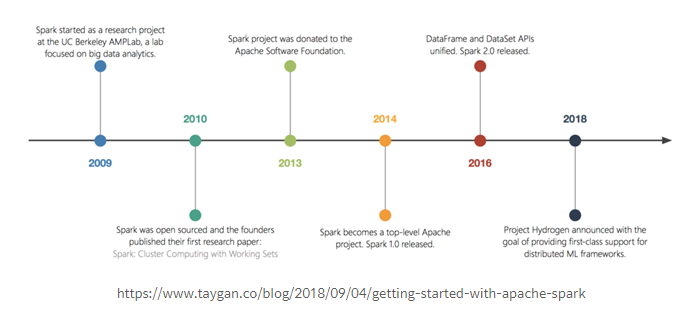

In [1]:
from IPython.display import Image
Image('c:/spark_img/spark_frm_01.png', width = 700)

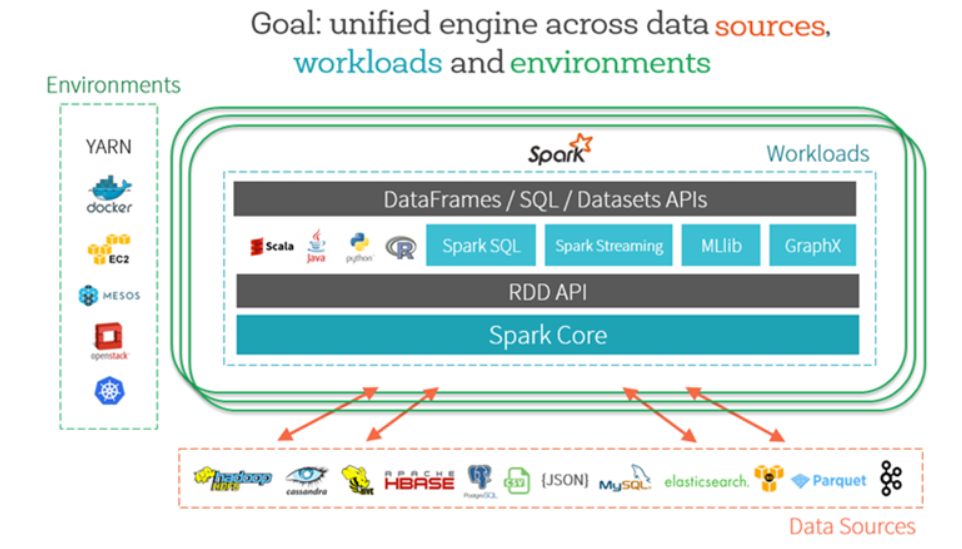

In [2]:
Image('c:/spark_img/spark_frm_02.png', width = 700)

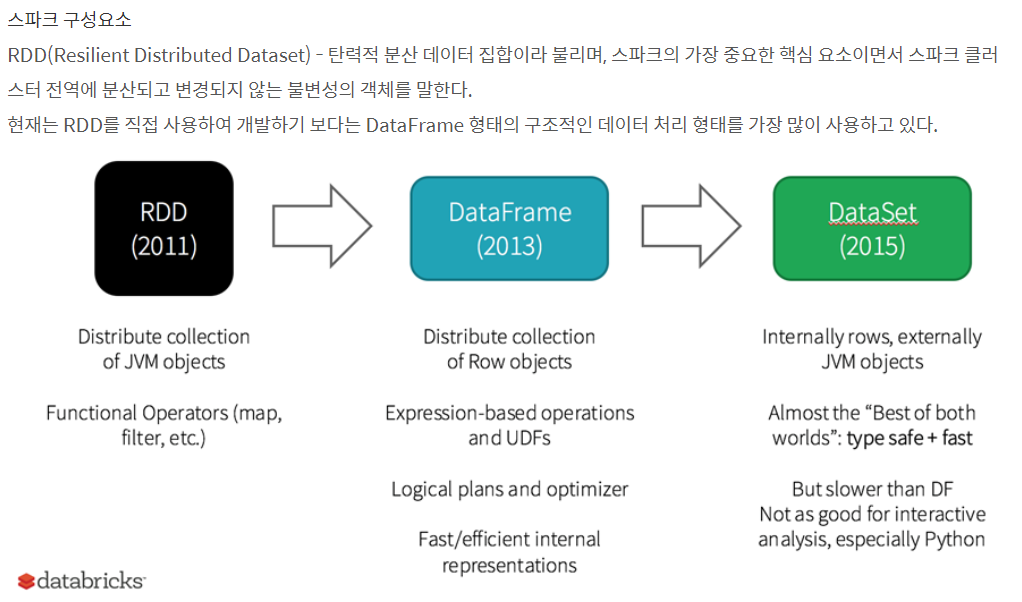

In [4]:
Image('c:/spark_img/spark_frm_rdd_03.png', width = 700)

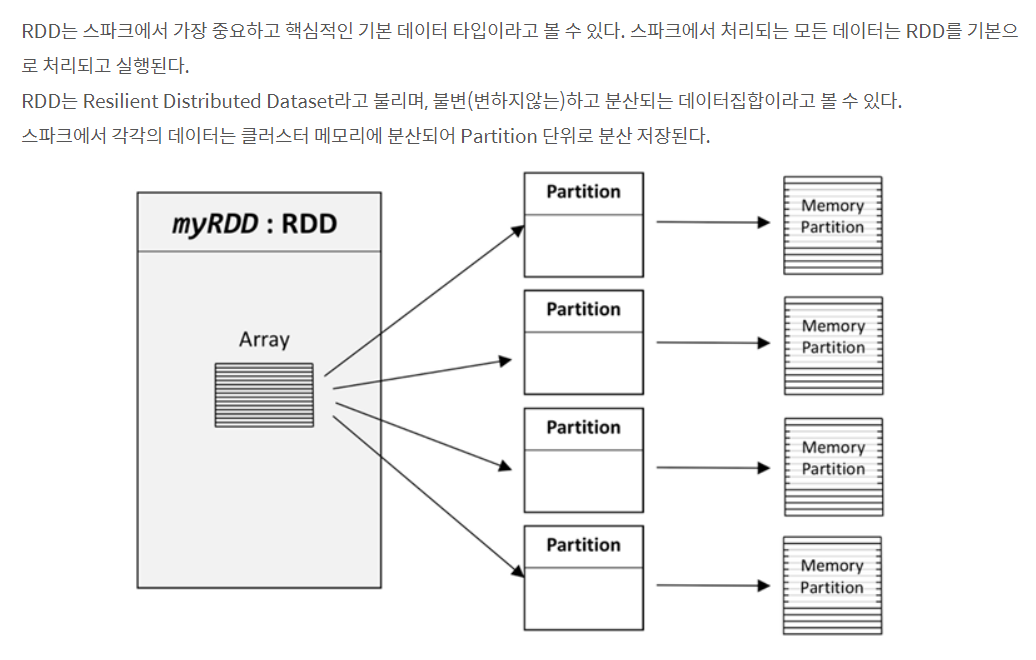

In [5]:
Image('c:/spark_img/spark_rdd_04.png', width = 700)

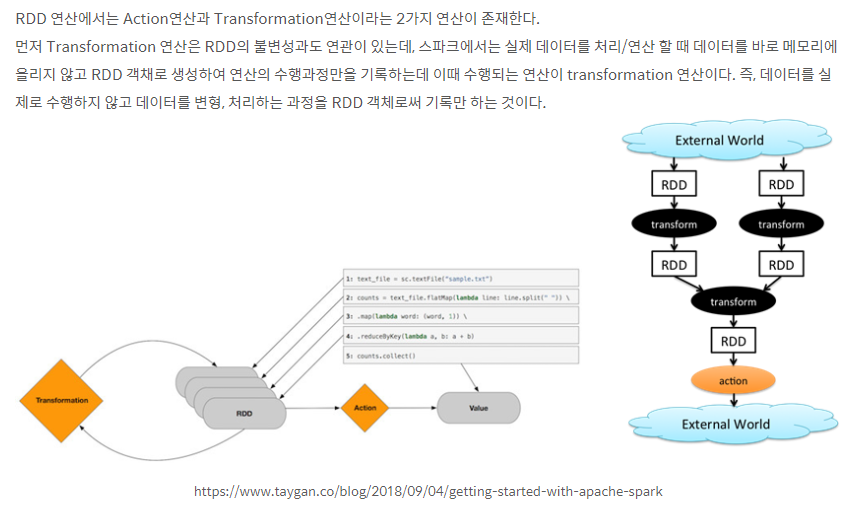

In [6]:
Image('c:/spark_img/spark_rdd_05.png', width = 700)

- RDD는 두가지의 연산으로 이루어져 있다.
- Transformation
- Action

- Transformation -> Lazy Execution 또는 Lazy Loading 
- 트랜스포메이션이 행해지면, RDD가 수행되는 것이 아니라, 새로은 RDD를 만들어 내고
- 그 새로운 RDD에 수행결과를 저장하게 된다.

- Action
- 메서드로 이루어진 실행작업이며 , 트랜스포메이션이 행해지고 나서 이루어지는 Evaluation 작업

In [8]:
from pyspark     import SparkConf , SparkContext
from pyspark.sql import SQLContext

In [11]:
conf  = SparkConf().setMaster('local').setAppName('sparkApp')
spark = SparkContext(conf=conf)
# spark = SparkContext()


ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=sparkApp, master=local) created by __init__ at <ipython-input-9-546200120be6>:2 

In [12]:
spark

<SparkContext master=local appName=sparkApp>

In [13]:
rdd = spark.textFile('./data/test.txt')
rdd

./data/test.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [14]:
lines = rdd.filter(lambda x : 'spark' in x) 
lines

PythonRDD[2] at RDD at PythonRDD.scala:53

- RDD 생성
- 데이터를 직접 만드는 방법(parallelize()) , 외부 데이터를 로드 방법으로


In [15]:
sample_rdd = spark.parallelize(['test' , 'this is a test rdd'])
sample_rdd

ParallelCollectionRDD[3] at readRDDFromFile at PythonRDD.scala:262

In [16]:
sample_rdd.collect()

['test', 'this is a test rdd']

- RDD 자주 쓰는 연산 함수
- collect() : RDD에 트랜스포메이션된 결과를 리턴하는 함수
- map() : 연산을 수행하고 싶을 때 사용하는 함수

In [17]:
numbers = spark.parallelize(list(range(5)))
numbers

ParallelCollectionRDD[4] at readRDDFromFile at PythonRDD.scala:262

In [19]:
s = numbers.map(lambda x : x * x).collect()
s

[0, 1, 4, 9, 16]

- flatMap() : 리스트들의 원소를 하나의 리스트로 flatten해서 리턴하는 함수
    

In [22]:
strings = spark.parallelize(['hi spark' , 'hi python' , 'hi django' , 'hi sklearn'])
flat_string = strings.flatMap(lambda x : x.split(' ')).collect()
flat_string


['hi', 'spark', 'hi', 'python', 'hi', 'django', 'hi', 'sklearn']

- filter() : 조건으로 필터링하는 연산자

In [23]:
num = spark.parallelize(list(range(1, 30, 3)))
num

ParallelCollectionRDD[13] at readRDDFromFile at PythonRDD.scala:262

In [24]:
result = num.filter(lambda x : x % 2 == 0 ).collect()
result

[4, 10, 16, 22, 28]

### Pair RDD

- pair rdd란 key-value 쌍으로 이루어진 RDD
- python tuple을 의미

In [33]:
# pair rdd 생성
pairRDD = spark.parallelize([(1,3),(2,4),(3,3),(1,5)])
pairRDD

ParallelCollectionRDD[30] at readRDDFromFile at PythonRDD.scala:262

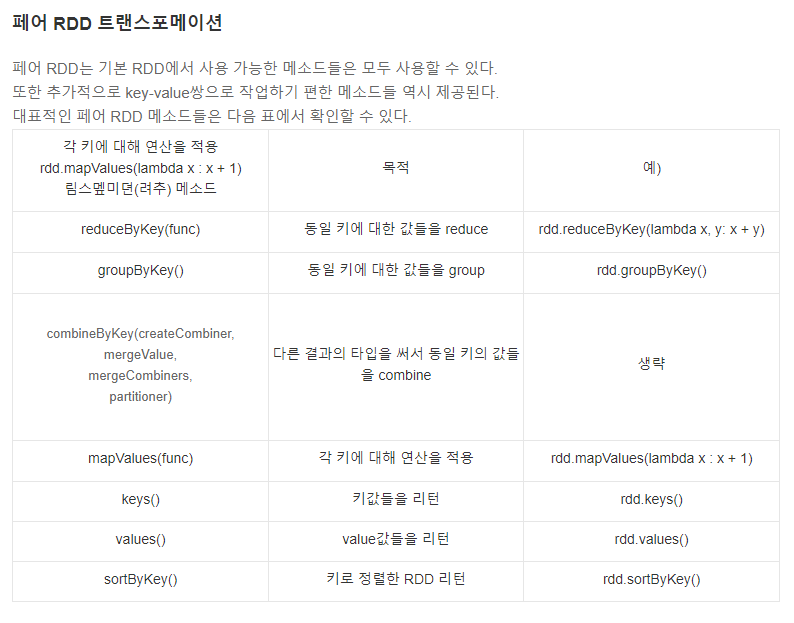

In [34]:
Image('c:/spark_img/spark_pair_rdd_08.png', width = 700)

- reduceByKey()


In [54]:
{
    i:j
    for i , j in pairRDD.reduceByKey(lambda x, y : x+y).collect()
}

{1: 8, 2: 4, 3: 3}

In [36]:
{
    i:j
    for i , j in pairRDD.mapValues(lambda x: x**2).collect()
}

{1: 25, 2: 16, 3: 9}

In [37]:
pairRDD.keys().collect()

[1, 2, 3, 1]

In [38]:
pairRDD.groupByKey().collect()

[(1, <pyspark.resultiterable.ResultIterable at 0x211db203320>),
 (2, <pyspark.resultiterable.ResultIterable at 0x211db2035c0>),
 (3, <pyspark.resultiterable.ResultIterable at 0x211db2035f8>)]

In [39]:
pairRDD.values().collect()

[3, 4, 3, 5]

In [40]:
pairRDD.sortByKey().collect()

[(1, 3), (1, 5), (2, 4), (3, 3)]

### 외부 데이터를 로드해서 RDD 생성하는 방법

In [41]:
customerRDD = spark.textFile('../data/spark-rdd-name-customers.csv')
customerRDD

../data/spark-rdd-name-customers.csv MapPartitionsRDD[46] at textFile at NativeMethodAccessorImpl.java:0

In [46]:
customerRDD.first()

'Alfreds Futterkiste,Germany'

In [51]:
# map연산자를 이용해서 콤마로 split하고 튜플로 리턴하는 구문을 작성해보자
cusPairs = customerRDD.map(lambda x : (x.split(',')[1] , x.split(',')[0]))
cusPairs.collect()

[('Germany', 'Alfreds Futterkiste'),
 ('Mexico', 'Ana Trujillo Emparedados y helados'),
 ('Mexico', 'Antonio Moreno Taqueria'),
 ('UK', 'Around the Horn'),
 ('Sweden', 'Berglunds snabbkop'),
 ('Germany', 'Blauer See Delikatessen'),
 ('France', 'Blondel pere et fils'),
 ('Spain', 'Bolido Comidas preparadas'),
 ('France', "Bon app'"),
 ('Canada', 'Bottom-Dollar Marketse'),
 ('UK', "B's Beverages"),
 ('Argentina', 'Cactus Comidas para llevar'),
 ('Mexico', 'Centro comercial Moctezuma'),
 ('Switzerland', 'Chop-suey Chinese'),
 ('Brazil', 'Comercio Mineiro'),
 ('UK', 'Consolidated Holdings'),
 ('Germany', 'Drachenblut Delikatessend'),
 ('France', 'Du monde entier'),
 ('UK', 'Eastern Connection'),
 ('Austria', 'Ernst Handel'),
 ('Brazil', 'Familia Arquibaldo'),
 ('Spain', 'FISSA Fabrica Inter. Salchichas S.A.'),
 ('France', 'Folies gourmandes'),
 ('Sweden', 'Folk och fa HB'),
 ('Germany', 'Frankenversand'),
 ('France', 'France restauration'),
 ('Italy', 'Franchi S.p.A.'),
 ('Portugal', 'Furi

In [56]:
# groupByKey() : 키값을 리스트 형태로 리턴 함수
cusPairs.groupByKey().collect()

[('Germany', <pyspark.resultiterable.ResultIterable at 0x211db1ec748>),
 ('Mexico', <pyspark.resultiterable.ResultIterable at 0x211db1ec4e0>),
 ('UK', <pyspark.resultiterable.ResultIterable at 0x211db1ec5f8>),
 ('Sweden', <pyspark.resultiterable.ResultIterable at 0x211db1ec240>),
 ('France', <pyspark.resultiterable.ResultIterable at 0x211db1ec710>),
 ('Spain', <pyspark.resultiterable.ResultIterable at 0x211db1ec828>),
 ('Canada', <pyspark.resultiterable.ResultIterable at 0x211db1ec550>),
 ('Argentina', <pyspark.resultiterable.ResultIterable at 0x211db1ec668>),
 ('Switzerland', <pyspark.resultiterable.ResultIterable at 0x211db184278>),
 ('Brazil', <pyspark.resultiterable.ResultIterable at 0x211db184eb8>),
 ('Austria', <pyspark.resultiterable.ResultIterable at 0x211db2165c0>),
 ('Italy', <pyspark.resultiterable.ResultIterable at 0x211db2163c8>),
 ('Portugal', <pyspark.resultiterable.ResultIterable at 0x211db2166d8>),
 ('USA', <pyspark.resultiterable.ResultIterable at 0x211db216ac8>),
 ('

In [64]:
# UK에 사는 고객이름만 출력한다면? (dict형식으로 만들어서)
groupKey = cusPairs.groupByKey().collect()

# for country , names in groupKey : 
#     if country == 'Germany' :
#         for name in names : 
#             print(name)
            

# groupKey

coustomerDict = {
    country : [ name for name in names ] for country , names in groupKey
}

coustomerDict['UK']

['Around the Horn',
 "B's Beverages",
 'Consolidated Holdings',
 'Eastern Connection',
 'Island Trading',
 'North/South',
 'Seven Seas Imports']

In [70]:
#  sortByKey : Key 오름차순으로 정렬을 해보고 상위 10개만 뽑는다면?
cusPairs.sortByKey().keys().collect()[:10]


['Argentina',
 'Argentina',
 'Argentina',
 'Austria',
 'Austria',
 'Belgium',
 'Belgium',
 'Brazil',
 'Brazil',
 'Brazil']

In [87]:
# 나라별 고객이 몇명인지를 카운트 해 본다면?
# cusPairs.collect()
mapR = cusPairs.mapValues(lambda x : 1 ).reduceByKey(lambda x, y : x+y)
# mapR = cusPairs.mapValues(lambda x : 1 )
# mapR.collect() 
{
    i:j
    for i, j in mapR.collect()
}


{'Germany': 11,
 'Mexico': 5,
 'UK': 7,
 'Sweden': 2,
 'France': 11,
 'Spain': 5,
 'Canada': 3,
 'Argentina': 3,
 'Switzerland': 2,
 'Brazil': 9,
 'Austria': 2,
 'Italy': 3,
 'Portugal': 2,
 'USA': 13,
 'Venezuela': 4,
 'Ireland': 1,
 'Belgium': 2,
 'Norway': 1,
 'Denmark': 2,
 'Finland': 2,
 'Poland': 1}

### Spark DataFrame


- spark dataframe 은 RDD의 확장된 구조이다
- 행, 열로 이루어진 내장 RDD

- 생성
- 스파크 세션을 이용한 생성
- SQL 컨텍스트의 테이블을 통한 생성

In [89]:
from pyspark     import SparkConf , SparkContext
from pyspark.sql import SQLContext
import json

In [90]:
sqlCtx = SQLContext(spark)
sqlCtx

In [97]:
# json 파일
# json -> RDD -> DataFrame
sample_json = spark.textFile('../data/cars.json')
cars_df = sqlCtx.createDataFrame( sample_json.map(lambda x : json.loads(x)) )
cars_df.collect()

[Row(brand='Ford', models={'name': 'Fiesta', 'price': '14260'}),
 Row(brand='Ford', models={'name': 'Focus', 'price': '18825'}),
 Row(brand='Ford', models={'name': 'Mustang', 'price': '26670'}),
 Row(brand='BMW', models={'name': '320', 'price': '40250'}),
 Row(brand='BMW', models={'name': 'X3', 'price': '41000'}),
 Row(brand='BMW', models={'name': 'X5', 'price': '60700'}),
 Row(brand='Fiat', models={'name': '500', 'price': '16495'})]

In [98]:
cars_df.printSchema()

root
 |-- brand: string (nullable = true)
 |-- models: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [99]:
cars_df.show()


+-----+--------------------+
|brand|              models|
+-----+--------------------+
| Ford|[name -> Fiesta, ...|
| Ford|[name -> Focus, p...|
| Ford|[name -> Mustang,...|
|  BMW|[name -> 320, pri...|
|  BMW|[name -> X3, pric...|
|  BMW|[name -> X5, pric...|
| Fiat|[name -> 500, pri...|
+-----+--------------------+



In [101]:
cars_df.first()

Row(brand='Ford', models={'name': 'Fiesta', 'price': '14260'})

In [102]:
# 데이터 프레임에 대한 연산
# select()

cars_df.select('brand').show()

+-----+
|brand|
+-----+
| Ford|
| Ford|
| Ford|
|  BMW|
|  BMW|
|  BMW|
| Fiat|
+-----+



In [104]:
cars_df.select('models.price').show() 

+-----+
|price|
+-----+
|14260|
|18825|
|26670|
|40250|
|41000|
|60700|
|16495|
+-----+



NoneType

In [105]:
# 컬럼의 타입 변환
from pyspark.sql.types import IntegerType

In [116]:
cars_price_type = cars_df.select('brand' , 'models.name', 'models.price')
# cars_price_type
cars_price_type = cars_price_type.withColumn('price' , cars_price_type['price'].cast(IntegerType())) 
cars_price_type.show()

+-----+-------+-----+
|brand|   name|price|
+-----+-------+-----+
| Ford| Fiesta|14260|
| Ford|  Focus|18825|
| Ford|Mustang|26670|
|  BMW|    320|40250|
|  BMW|     X3|41000|
|  BMW|     X5|60700|
| Fiat|    500|16495|
+-----+-------+-----+



In [118]:
# cars_price_type.printSchema()
cars_price_type.first()

Row(brand='Ford', name='Fiesta', price=14260)

In [120]:
# 비교연산
# cars_price_type.collect()
cars_price_type.filter(cars_price_type['price'] > 20000).show()

+-----+-------+-----+
|brand|   name|price|
+-----+-------+-----+
| Ford|Mustang|26670|
|  BMW|    320|40250|
|  BMW|     X3|41000|
|  BMW|     X5|60700|
+-----+-------+-----+



In [122]:
# 그룹핑
cars_price_type.groupBy('brand').count().show()

+-----+-----+
|brand|count|
+-----+-----+
|  BMW|    3|
| Fiat|    1|
| Ford|    3|
+-----+-----+



ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=sparkApp, master=local) created by __init__ at <ipython-input-9-546200120be6>:2 

In [124]:
import pyspark

conf = pyspark.SparkConf()\
        .setAppName("spark-sql")\
        .set("spark.driver.extraClassPath", "../data/ojdbc6.jar")
sc = pyspark.SparkContext(conf=conf)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=sparkApp, master=local) created by __init__ at <ipython-input-9-546200120be6>:2 